In [167]:
from myutils import *
import librosa as lr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
import librosa.display
import numpy as np
import pandas as pd
from scipy import fftpack
from pandas.plotting import scatter_matrix
import sklearn
import time
import re


In [4]:
colors = ['red', 'green', 'blue', 'black', 'silver', 'firebrick', 'sandybrown', 'gold', 'olivedrab',
          'chartreuse', 'cyan', 'darkblue', 'coral', 'orange',
          'yellow', 'greenyellow', 'steelblue']
def plot_corr_matrix(data,attr,fig_number):
    correlations=data.corr()
    fig=plt.figure(fig_number)
    ax=fig.add_subplot(111)
    ax.set_title("Correlation Matrix for Specified Attributes")
    ax.set_xticklabels(['']+attr, rotation=45, ha='right', rotation_mode='anchor')

    ax.set_yticklabels(['']+attr)
    cax=ax.matshow(correlations,vmax=1,vmin=-1)
    fig.colorbar(cax)
    fig.tight_layout()
    plt.show()

def normal(x, sigma2=1, mu=0):
    return 1/(np.sqrt(sigma2*2*3.14159)) * np.exp(-(x - mu)**2/(2*sigma2**2))

jenre = ['pop', 'rock', 'rok_and_roll', 'classik', 'jazz', 'folk']

In [168]:
"""
преобразуем все файлы в wav c частотой 22050, моно
"""

start_time = time.time()
sample_rate = 22050

source = '/Users/admin/Downloads/urev/music/'


files = find_files(source, 'wav')

music = {jen:[] for jen in jenre}
for jen in jenre:
    for f in files:
        if jen in f:
            music[jen].append(f)

tracks_feature = []

for jen in jenre:

    scale_factor = len(music[jen])

    for i in range(scale_factor):
        print(music[jen][i])
        try:
            res = music[jen][i].split('/'+jen+'/')
            res = res[1].split(' - ')
            title = res[1]
            artist = res[0]
        except:
            title = 'None'
            artist = 'None'

            
        # для анализа выбираем 30 секунд
        x, freq = lr.load(music[jen][i], sr = sample_rate)
        x = x[(sample_rate*40):((sample_rate*70))]

        sig_size = len(x)
        sig_size = len(x)

        sample_freqs = fftpack.fftfreq(sig_size, d = 1/sample_rate)
        magnitude_freqs = 2.0/sig_size * np.abs(fftpack.fft(x)[:sig_size//2])
        f0 = [32, 64, 125, 250, 500, 1000, 2000, 4000]
        mag_weighted = []

        for fi in f0:
            num_elem = len(magnitude_freqs[15*fi:4*15*fi])
            grid_elems = np.linspace(-3, 3, num=num_elem)
            weights = normal(grid_elems)
            magnitude_freqs_weighted = magnitude_freqs[15*fi:4*15*fi]*weights
            mag_weighted.append(magnitude_freqs_weighted.mean())


        # извлекаем beats_per_minutes для каждого трека
        bpm_i = lr.beat.beat_track(x, sr = sample_rate)[0]
        
        # извлекаем zer_crossing_freq для каждого трека
        zero_crossings_i = sum(librosa.zero_crossings(x, pad=False))
        
        spectral_centroids = lr.feature.spectral_centroid(x, sr=freq, n_fft=8192)[0]
        spectral_centroids_grad = np.gradient(spectral_centroids)
        
        spectral_rolloff = lr.feature.spectral_rolloff(x+0.01, sr=freq, n_fft=8192)[0]
        spectral_rolloff_grad = np.gradient(spectral_rolloff)
        
        mfccs_mean = []
        
        # извлекаем мелчастотные кепстральные коэффициенты
        mfccs = lr.feature.mfcc(x, sr=freq)
        
        # усредняем мелчастотные коэффициенты
        for i in mfccs:
            mfccs_mean.append(i.mean())
        hop_length = 512

        # извлекам и усредняем значение хромограммы
        chroma_stft_mean = np.mean(lr.feature.chroma_stft(x, sr=freq, hop_length=hop_length))  
        
        tracks_feature.append([artist + ' - ' + title, jen,\
          bpm_i,zero_crossings_i,spectral_centroids.mean(), pd.Series(spectral_centroids).median(),\
          spectral_rolloff.mean(), pd.Series(spectral_rolloff).median(),6*spectral_centroids_grad.std(),\
          6*spectral_rolloff_grad.std(), chroma_stft_mean] + mfccs_mean + mag_weighted)

tracks_feature = pd.DataFrame(tracks_feature, columns = ['track', 'jenre', \
                     'bpm', 'fzero', 'centroid_mean', 'centroid_median', 'centroid_grad_bandwidth',\
                    'rollof_mean', 'rollof_median', 'rollof_grad_bandwidth', 'chroma_stft_mean',\
                    'mfcc1', 'mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7',\
                   'mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15',\
                    'mfcc16','mfcc17','mfcc18','mfcc19', 'mfcc20', \
                     'band32', 'band64', 'band125', 'band250', 'band500', 'band1000', 'band2000', 'band4000'])

#tracks_feature.to_csv('tracks_feature.csv', sep='\t')

#print('Working time: {: >20}'.format(time.time() - start_time))


/Users/admin/Downloads/urev/music/pop/Ed Sheeran - Shape of You.wav
/Users/admin/Downloads/urev/music/pop/Ricky Martin - Livin' la Vida Loca.wav
/Users/admin/Downloads/urev/music/pop/Ricky Martin - She Bangs.wav
/Users/admin/Downloads/urev/music/pop/Christina Aguilera - Fighter.wav
/Users/admin/Downloads/urev/music/pop/Michael Jackson - Billie Jean.wav
/Users/admin/Downloads/urev/music/pop/Ricky Martin - María.wav
/Users/admin/Downloads/urev/music/pop/Freemasons - Heartbreak (Make Me a Dancer).wav
/Users/admin/Downloads/urev/music/pop/George Michael - Roxanne.wav
/Users/admin/Downloads/urev/music/pop/George Michael - Jesus to a Child.wav
/Users/admin/Downloads/urev/music/pop/Sting - Fragile.wav
/Users/admin/Downloads/urev/music/pop/Adele - Rolling In The Deep.wav
/Users/admin/Downloads/urev/music/pop/Chris Christmas - Last Christmas.wav
/Users/admin/Downloads/urev/music/pop/Britney Spears - Oops.I Did It Again.wav
/Users/admin/Downloads/urev/music/pop/Sting - Englishman In New York.wa

/Users/admin/Downloads/urev/music/classik/Beethoven - Fur Elise.wav
/Users/admin/Downloads/urev/music/classik/Равель (Цимермен) - Концерт для ф-но №1 G-dur - 1. Allegramente.wav
/Users/admin/Downloads/urev/music/classik/Вивальди - Зима_I Allegro non molto - Оркестр г. Сан-Марко_д. А.Лиццио.wav
/Users/admin/Downloads/urev/music/classik/Vivaldi - The Four Seasons, Summer-Presto.wav
/Users/admin/Downloads/urev/music/classik/Штраус - Трик_трак_полька.wav
/Users/admin/Downloads/urev/music/classik/Шостакович - Балетная сюита №1.wav
/Users/admin/Downloads/urev/music/classik/Россиниу - Увертюра к Сороке воровке.wav
/Users/admin/Downloads/urev/music/classik/Piazzolla - Libertango.wav
/Users/admin/Downloads/urev/music/classik/Равель (Цимермен) - Концерт №1 G-dur - 3. Presto.wav
/Users/admin/Downloads/urev/music/classik/Beethoven - Piano Sonata No8_Rondo.wav
/Users/admin/Downloads/urev/music/classik/Ян Сибелиус - Ель.wav
/Users/admin/Downloads/urev/music/classik/П.И.Чайковский - Вальс-Скерцо дл

In [37]:
tracks_feature.head()

,track,jenre,bpm,fzero,centroid_mean,centroid_median,centroid_grad_bandwidth,rollof_mean,rollof_median,rollof_grad_bandwidth,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,Ed Sheeran - Shape of You.wav,pop,129.199219,53981,2046.975316,1936.848940,4363.044451,4015.942383,718.191083,1514.640727,...,-10.378889,4.314054,-6.117220,-1.385151,-6.993754,-1.275065,-12.237017,1.781470,-7.985014,-1.505523
1,Ricky Martin - Livin' la Vida Loca.wav,pop,117.453835,89556,2681.197482,2632.079688,5725.254963,5652.465820,462.040401,680.161289,...,-4.848916,11.264945,-8.493621,3.994189,-5.839222,3.724027,-6.925753,5.357692,-2.047004,2.112004
2,Ricky Martin - She Bangs.wav,pop,143.554688,67621,2399.259485,2380.223611,5482.952262,5521.920776,603.327835,1091.502696,...,-2.323709,12.478619,-5.880477,7.596746,-1.393692,5.808564,-6.830026,7.366739,-3.239320,-0.351064
3,Christina Aguilera - Fighter.wav,pop,95.703125,94043,2398.418424,2351.815632,4429.516965,4076.504517,467.587356,1177.229263,...,-11.163166,8.322250,-4.914295,4.472909,-4.760977,8.213812,-2.980584,1.879194,-4.438342,1.100428
4,Michael Jackson - Billie Jean.wav,pop,117.453835,49840,2625.241824,2559.741901,6242.447669,6359.024048,877.493207,1455.604576,...,-8.741439,5.901270,-4.233559,5.925020,-2.788321,4.719730,-0.534044,4.551762,-1.516516,-0.552690


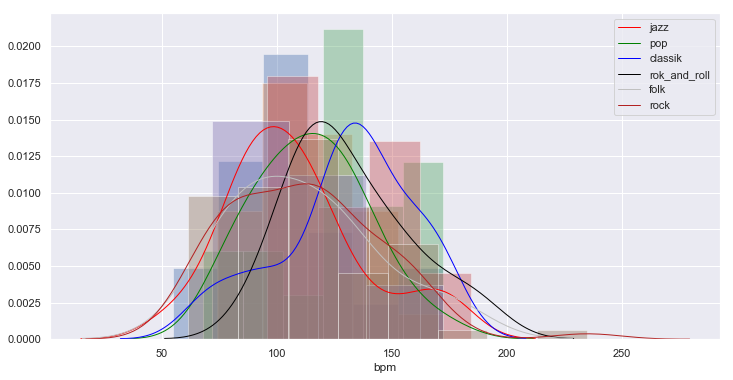

In [46]:
sns.set(rc={'figure.figsize':(12, 6)})

for jen, color in zip(set(tracks_feature.jenre), colors):
    sns.distplot(tracks_feature.bpm[tracks_feature.jenre == jen], kde_kws = {'color':color, 'lw':1, 'label':jen})

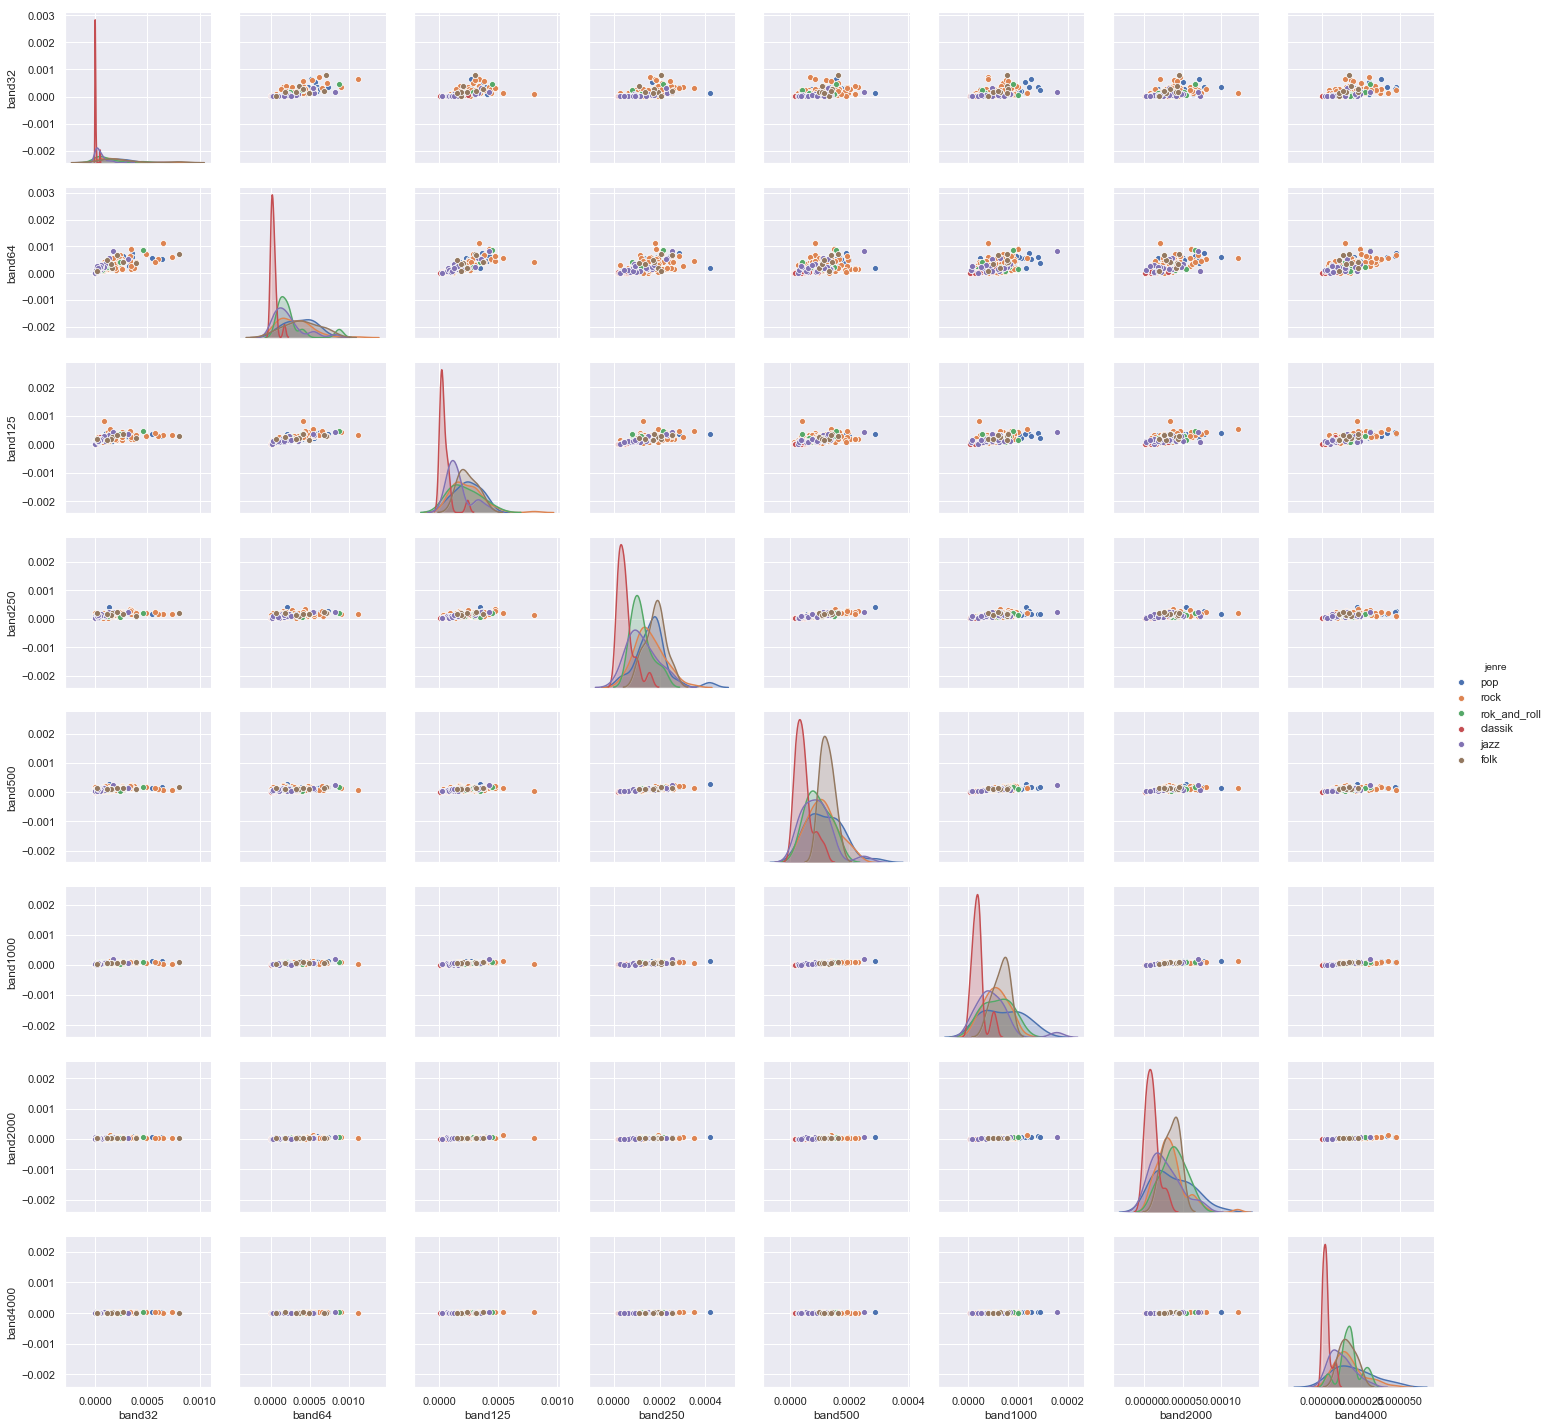

In [173]:
features = tracks_feature.drop(['track'], axis=1)
sns.set(rc={'figure.figsize':(15, 15)})
sns.pairplot(features[['jenre', 'band32', 'band64', 'band125', 'band250',\
                       'band500', 'band1000', 'band2000', 'band4000']], hue='jenre')

In [64]:
# формируем массивы фич и целевую переменную
X = tracks_feature.drop(['jenre', 'track'], axis=1)
y = tracks_feature['jenre']

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()

In [67]:
le.fit(y)

LabelEncoder()

In [68]:
# кодируем классы жанров
y_labeled = le.fit_transform(y)

In [69]:
#разбираем набор данных на обучающую и тестовыую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y_labeled, stratify = y_labeled, random_state = 0)

#StandartScaler
scaler = StandardScaler()

# подгоняем scaler на обучающих данных
scaler.fit(X_train)

# преобразование данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [ ]:
# к этому этапу данный закодированы, фичи приведены к стандартному виду (StandartScaler)
# пробуем классификаторы
# согласно простой инструкции sklearn пробуем в следующем порядке
# 1. Linear SVC
# 2. KneighBors Classifier
# 3. Naive Bayes
# 4. SGD Classifier

In [125]:
from sklearn.svm import LinearSVC # ConvergenceWarning reached max_iter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [75]:
# попробуем уменьшить размерность данных с помощью алгоритма главных компонент PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
# use some various of kernel: “linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed”

In [76]:
# также уменьшить размерность или посмотреть важность признаков можно с помощью аотрибута feature_importances_ в 
# RandomForest

In [140]:
# оставляем первые две компоненты
pca1 = PCA(n_components = 2, whiten = True, random_state = 0).fit(X_train_scaled)
X_train_scaled_pca = pca1.transform(X_train_scaled)
X_test_scaled_pca = pca1.transform(X_test_scaled)

pca2 = PCA(n_components = 2, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca2.transform(X_train)
X_test_pca = pca2.transform(X_test)

In [ ]:
# анализ PCA при разных ядрах
kernals = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine', 'precomputed']
for k, i in zip(kernals, range(1, 7)):
    kernal_pca = KernelPCA(n_components = 2, whiten = True, random_state = 0, kernal='').fit(X_train)
    X_train_pca = kernal_pca.transform(X_train)
    temp_df = pd.DataFrame({'jenre':y_train, '1_pca':X_train_pca[:, 0], '2_pca':X_train_pca[:, 1]})
    plt.subplot(2, 3, i)
    plt.title(k)
    sns.scatterplot(x='1_pca', y='2_pca', data=temp_df)

# LinearSVC

In [100]:
lin_svc = LinearSVC(random_state=0, tol=0.01, max_iter=10000, solver='')

In [126]:
# train without features transformation
parametrs = {'C':[1, 10, 100, 1000, 10000]}
grid_search_cv = GridSearchCV(lin_svc, parametrs, cv=5, iid=True)
grid_search_cv.fit(X_train, y_train)
best_rf = grid_search_cv.best_estimator_

In [127]:
grid_search_cv.best_params_

{'C': 1}

In [128]:
best_rf.score(X_test, y_test)

0.275

In [129]:
# train with features transformation (scaled)
parametrs = {'C':[1, 10, 100, 1000, 10000]}
grid_search_cv = GridSearchCV(lin_svc, parametrs, cv=5, iid=True)
grid_search_cv.fit(X_train_scaled, y_train)
best_rf = grid_search_cv.best_estimator_

In [130]:
grid_search_cv.best_params_

{'C': 1}

In [131]:
# LinearSVC чувствителен к нормировке данных
best_rf.score(X_test_scaled, y_test)

0.55

In [132]:
# train without features transformation
parametrs = {'C':[1, 10, 100, 1000, 10000]}
grid_search_cv = GridSearchCV(lin_svc, parametrs, cv=5, iid=True)
grid_search_cv.fit(X_train_scaled_pca, y_train)
best_rf = grid_search_cv.best_estimator_

In [133]:
grid_search_cv.best_params_

{'C': 1}

In [134]:
# странно, но понижение размерности вплоть до 2 не сказалось на качестве классификации!!!???
best_rf.score(X_test_scaled_pca, y_test)

0.55

# KNeighborsClassifier

In [135]:
knn = KNeighborsClassifier(n_jobs=-1)

In [154]:
# train without features transformation
parametrs = {'n_neighbors':range(2, 11)}
best_scores_knn = []
for X_train_i, X_test_i in zip([X_train, X_train_scaled, X_train_pca, X_train_scaled_pca], [X_test, X_test_scaled, X_test_pca, X_test_scaled_pca]):
    grid_search_cv = RandomizedSearchCV(knn, parametrs, cv=5, iid=True)
    grid_search_cv.fit(X_train_i, y_train)
    best_clf = grid_search_cv.best_estimator_
    best_scores_knn.append(best_clf.score(X_test_i, y_test))

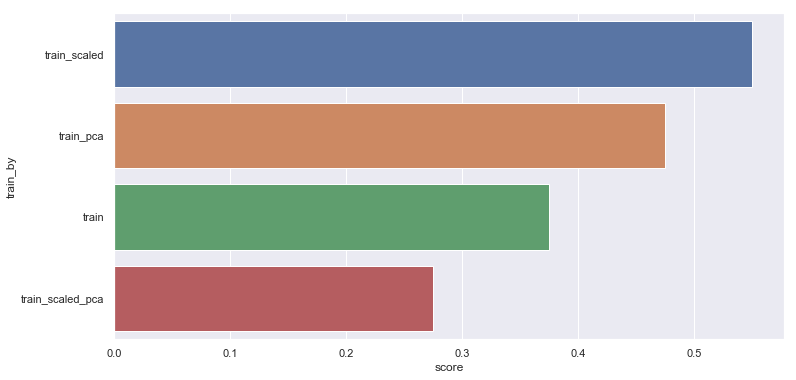

In [155]:
estimators_label = ['train', 'train_scaled', 'train_pca', 'train_scaled_pca']
best_scores_knn = pd.DataFrame({'train_by':estimators_label, 'score':best_scores_knn})\
            .sort_values(by='score', ascending=False)
sns.barplot(x='score', y='train_by', data=best_scores_knn)

# SGDClassifier

In [158]:
sgd = SGDClassifier(n_jobs=-1, random_state=0)

In [161]:
# train without features transformation
parametrs = {'alpha':[0.1, 0.01, 0.001, 0.0001]}
best_scores_sgd = []
for X_train_i, X_test_i in zip([X_train, X_train_scaled, X_train_pca, X_train_scaled_pca], [X_test, X_test_scaled, X_test_pca, X_test_scaled_pca]):
    grid_search_cv = GridSearchCV(sgd, parametrs, cv=5, iid=True)
    grid_search_cv.fit(X_train_i, y_train)
    best_clf = grid_search_cv.best_estimator_
    best_scores_sgd.append(best_clf.score(X_test_i, y_test))

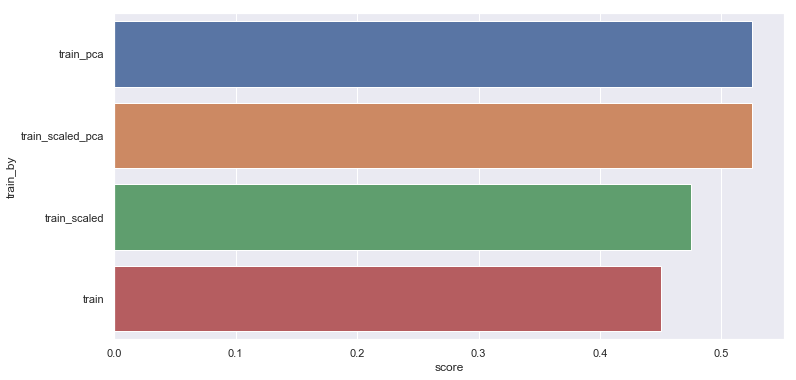

In [162]:
estimators_label = ['train', 'train_scaled', 'train_pca', 'train_scaled_pca']
best_scores_sgd = pd.DataFrame({'train_by':estimators_label, 'score':best_scores_sgd})\
            .sort_values(by='score', ascending=False)
sns.barplot(x='score', y='train_by', data=best_scores_sgd)

# RandomForestClassifier

In [163]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [164]:
# train without features transformation
parametrs = {'n_estimators':[10, 20, 30, 40, 50], 
             'max_depth':range(1, 11)}
best_scores_rf = []
feature_importances = []
for X_train_i, X_test_i in zip([X_train, X_train_scaled, X_train_pca, X_train_scaled_pca], [X_test, X_test_scaled, X_test_pca, X_test_scaled_pca]):
    grid_search_cv = RandomizedSearchCV(rf, parametrs, cv=5, iid=True)
    grid_search_cv.fit(X_train_i, y_train)
    best_clf = grid_search_cv.best_estimator_
    feature_importances.append(best_clf.feature_importances_)
    best_scores_rf.append(best_clf.score(X_test_i, y_test))

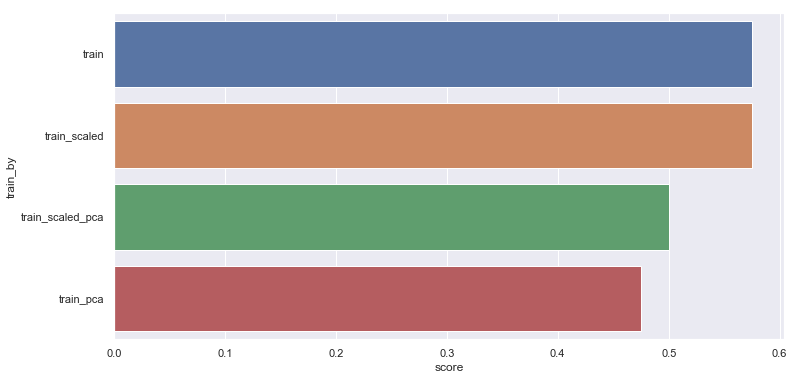

In [165]:
estimators_label = ['train', 'train_scaled', 'train_pca', 'train_scaled_pca']
best_scores_rf = pd.DataFrame({'train_by':estimators_label, 'score':best_scores_rf})\
            .sort_values(by='score', ascending=False)
sns.barplot(x='score', y='train_by', data=best_scores_rf)